# 11. 사이킷런으로 구현해 보는 머신러닝

머신러닝의 알고리즘 종류는 크게 3가지로 나눌 수 있습니다.<br>

지도학습 (Supervised Learning ▶ 분류, 회귀, 예측<br>
비지도학습 (Unsupervised Learning) ▶ 클러스터링, 자원축소<br>
강화학습 (Reinforcement Learning)<br>

어느 알고리즘을 사용해야 할까? <br>

고려할 사항<br>
- 데이터의 크기, 품질, 특성
- 가용 연산(계산) 시간
- 작업의 긴급성
- 데이터를 이용해 하고 싶은 것

![MLchart](https://blogs.sas.com/content/saskorea/files/2019/03/%EC%B9%98%ED%8A%B82.png)

보통 라벨(정답)의 유무에 따라 머신러닝을 지도학습(정답O)과 비지도학습(정답X)으로 나눈다.<br>

데이터가 매우 복잡하다면 차원을 축소하기도 하고 만약 주요한 성분이 있다면 주성분 분석을 적용하기도.<br>

또한, 데이터의 종류에 따라 같은 회귀라도 선형회귀는 수치형 데이터(연속적인 데이터)를 예측하는 데 사용된다면, <br>
로지스틱 회귀는 분류(엄밀히 말하면 이진 분류)에 사용된다.<br>

따라서 <b>정답 유무, 데이터의 종류, 특성, 문제 정의</b>에 따라 머신러닝 알고리즘은 굉장히 복합적으로 사용된다.

### 강화 학습

학습하는 시스템을 에이전트라고 하고, 환경을 관찰해서 에이전트가 스스로 행동하게 합니다. <br>
모델은 그 결과로 특정 보상을 받아 이 보상을 최대화하도록 학습합니다. <br>
강화학습에서 기본적으로 쓰이는 용어를 정리하면 다음과 같습니다. <br>

에이전트(Agent): 학습 주체 (혹은 actor, controller)<br>
환경(Environment): 에이전트에게 주어진 환경, 상황, 조건<br>
행동(Action): 환경으로부터 주어진 정보를 바탕으로 에이전트가 판단한 행동<br>
보상(Reward): 행동에 대한 보상을 머신러닝 엔지니어가 설계<br>

강화학습 알고리즘의 대표적인 종류<br>

Monte Carlo methods<br>
Q-Learning<br>
Policy Gradient methods<br>

강화학습 관련 커뮤니티<br>
https://github.com/reinforcement-learning-kr
https://github.com/aikorea/awesome-rl

참고: https://blogs.sas.com/content/saskorea/2017/08/22/%EC%B5%9C%EC%A0%81%EC%9D%98-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84-%EA%B3%A0%EB%A5%B4%EA%B8%B0-%EC%9C%84%ED%95%9C-%EC%B9%98%ED%8A%B8/

### 사이킷런에서 가이드하는 머신러닝 알고리즘

![sci](https://scikit-learn.org/stable/_static/ml_map.png)

참고: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

사이킷런에서 알고리즘을 나누는 기준

- 샘플 개수(데이터 개수)
- 라벨 유무(정답 유무)
- 범주형 데이터인가 수치형 데이터인가(데이터의 종류)

Scikit-learn은 다음의 명령어로 설치

pip install scikit-learn

In [1]:
# 모듈 import & 버전 확인
import sklearn
print(sklearn.__version__)

1.0


## 데이터 표현법

사이킷런의 알고리즘은 파이썬 클래스로 구현되어 있고, <br>
데이터셋은 NumPy의 ndarray, Pandas의 DataFrame, SciPy의 Sparse Matrix를 이용해 나타낼 수 있다. <br>
그리고 훈련과 예측 등 머신러닝 모델을 다룰 때는 CoreAPI라고 불리는 fit(), transfomer(), predict()과 같은 함수들을 이용한다.

사이킷런의 API
참고: https://scikit-learn.org/stable/modules/classes.html
        
주로 사용하는 API
![scikAPI](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_sP0AtFE.max-800x600.png)

### 사이킷런의 데이터 표현 방식
- 특성 행렬(Feature Matrix)
- 타겟 벡터(Target Vector)
![fmtv](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_1.max-800x600.png)
출처: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Features-and-Labels-Grid


### <b> 특성 행렬 </b>
- 입력 데이터를 의미
- 특성(feature)
  <br> - 데이터에서 수치 값, 이산 값, 불리언 값으로 표현되는 개별 관측치를 의미합니다. 
  <br>  - 특성 행렬에서는 열에 해당하는 값입니다.
- 표본(sample): 각 입력 데이터, 특성 행렬에서는 행에 해당하는 값입니다.
- n_samples: 행의 개수(표본의 개수)
- n_features: 열의 개수(특성의 개수)
- X: 통상 특성 행렬은 변수명 X로 표기합니다.<br>
[n_samples, n_features]은 [행, 열] 형태의 2차원 배열 구조를 사용하며 <br>
이는 NumPy의 ndarray, Pandas의 DataFrame, SciPy의 Sparse Matrix를 사용하여 나타낼 수 있습니다.

### <b> 타겟 벡터(Target Vector) </b>
- 입력 데이터의 라벨(정답) 을 의미합니다.
- 목표(Target): 라벨, 타겟값, 목표값이라고도 부르며 특성 행렬(Feature Matrix)로부터 예측하고자 하는 것을 말합니다.
- n_samples: 벡터의 길이(라벨의 개수)
타겟 벡터에서 n_features는 없습니다.
- y: 통상 타겟 벡터는 변수명 y로 표기합니다.<br>
타겟 벡터는 보통 1차원 벡터로 나타내며, 이는 NumPy의 ndarray, Pandas의 Series를 사용하여 나타낼 수 있습니다.<br>
(단, 타겟 벡터는 경우에 따라 1차원으로 나타내지 않을 수도 있습니다. 이 노드에서 사용되는 예제는 모두 1차원 벡터입니다.)

### ❗️특성 행렬 X의 n_samples와 타겟 벡터 y의 n_samples는 동일해야 합니다. (행의 개수 동일해야)

## 회귀 모델 실습

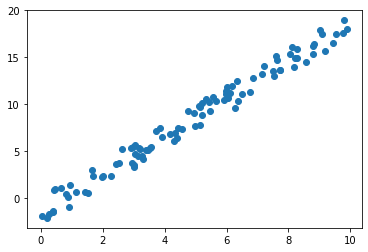

In [2]:
# yn이라는 라벨 값을 각각 가지는 입력데이터 xn 100개로 이루어져 있는 데이터
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)    # 특정 seed(10)를 가진다
x = 10 * r.rand(100)    # rand: 0~1사이 표준정규분포 난수를 100개 생성 > * 10: 0~10사이 100개
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

참고:
https://frhyme.github.io/python-libs/np_random_randomstate/
https://nittaku.tistory.com/443

In [3]:
# 입력 데이터의 모양
x.shape

(100,)

In [4]:
# 정답 데이터의 모양
y.shape

(100,)

x와 y의 모양은 (100,)으로 1차원 벡터

In [5]:
# 사이킷런에서 ML 모델을 사용하기 위해 모델 객체를 생성
# 모델: LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [6]:
# 훈련시키자! fit 메소드
# 인자로 특성 행렬과 타겟 벡터,
# 즉 행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답(라벨)을 각각 넣어준다

# ! 에러 발생
model.fit(x, y)

# x를 행렬로 바꾸어 주어야 한다

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
type(x)

In [ ]:
x

In [ ]:
# x를 X 행렬로 바꾼다
X = x.reshape(100,1)

# x는 numpy의 ndarray타입이니 reshape을 사용한다

In [ ]:
X

In [ ]:
# 다시 넣어 훈련시킨다
model.fit(X,y)

In [ ]:
# 새로운 데이터를 넣어 예측해보기

x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

linspace(시작점, 끝점, 개수) : 균일 간격으로 숫자 생성
참고: https://jimmy-ai.tistory.com/41

### 잠깐 Tip!
reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 준다.<br>
즉, x_new의 인자의 개수가 100개이므로, (100, 1)의 형태나 (2, 50)의 형태 등으로 변환해 줄 수 있다.<br>
(2, -1)을 인자로 넣으면 (2, 50)의 형태로 자동으로 변환. 

In [ ]:
X_ = x_new.reshape(-1,1)
X_.shape

학습된 회귀 모델이 잘 예측했는지 모델의 성능을 평가해 보자.<br>
앞에서 간단히 소개하였듯이 모델의 성능 평가 관련 모듈은 sklearn.metrics에 저장되어 있다.<br>
회귀 모델의 경우 RMSE(Root Mean Square Error) 를 사용해 성능을 평가.

In [ ]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y,y_new))

print(error)

np.sqrt: 제곱근(Root) 구하기<br>
np.sqrt 함수 안에 MSE를 넣어 RMSE를 만든다

In [ ]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

그래프의 점들과 회귀선이 거의 일치함을 확인할 수 있다

## datasets 모듈

In [ ]:
# 와인 데이터셋 이용

from sklearn.datasets import load_wine
data = load_wine()
type(data)

In [ ]:
print(data)

In [ ]:
data.keys()

키값 data는 특성 행렬<br>
파이썬의 딕셔너리와 유사하다▶ 키에 접근하기 위해서 .을 사용할 수 있다.

### 1. data

In [ ]:
data.data

특성 행렬은 2차원이며 행에는 데이터의 개수(n_samples)가 열에는 특성의 개수(n_features)가 들어 있다. 

In [ ]:
data.data.shape

#특성이 13개, 데이터가 178개인 특성 행렬

In [ ]:
# 차원을 확인
data.data.ndim

### 2. target

In [ ]:
# 키값 target은 타겟벡터
data.target

In [ ]:
# 타겟벡터는 1차원
# 타겟벡터의 길이는 특성행렬의 데이터 개수와 일치해야 한다
data.target.shape

### 3. feature_names

In [ ]:
# 특성들의 이름 확인
data.feature_names

In [ ]:
len(data.feature_names)

# feature_names의 개수와 특성 행렬의 n_features(열)의 숫자가 일치

### 4. target_names

In [ ]:
# 분류하고자 하는 대상
data.target_names

### 5. DESCR

In [ ]:
# DESCR: describe의 약자, 데이터에 대한 설명
print(data.DESCR)

## 사이킷런 데이터셋을 이용한 분류 문제 실습

### <b> DataFrame으로 나타내기</b>

In [ ]:
# 특성 행렬을 Pandas의 DataFrame으로 나타낼 수 있다
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

### <b>머신러닝</b> 
머신러닝 모델을 만들고 예측을 해보자
특성 행렬은 통상 변수명 X에 저장하고, 타겟 벡터는 y에 저장

In [ ]:
X = data.data
y = data.target

In [ ]:
# 모델 생성, 분류 문제이므로 RandomForestClassifier 사용
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# 훈련시키기
model.fit(X, y)

In [ ]:
# 예측하기
y_pred = model.predict(X)

In [ ]:
# 성능 평가하기

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다. 
print(classification_report(y, y_pred))
#정확도를 출력합니다. 
print("accuracy = ", accuracy_score(y, y_pred))

왜 정확도가 1(100)일까? 뒤에서 설명

## Estimator

앞의 실습에서 머신러닝 모델의 훈련은 fit() 메서드를 이용하고 예측은 predict() 메서드를 이용했다. <br>
사이킷런은 API가 매우 일관성 있게 설계되어 있다는 점이 장점<br>
이번에는 모델 훈련에서 핵심이 되는 API를 살펴보도록 하자.

### <b>Estimator 객체</b>

데이터셋을 기반으로 머신러닝 모델의 파라미터를 추정하는 객체를 Estimator라고 한다.<br>
사이킷런의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 구현되어 있습니다. <br>
추정을 하는 과정 즉, 훈련은 Estimator의 fit()메서드를 통해 이루어지고, 예측은 predict()메서드를 통해 이루어진다.

앞에서 실습에 사용한 Estimator 객체는 LinearRegression()과 RandomForestClassifier().

와인 분류 문제 해결하는 과정
![wine solution](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_2_4s16x9i.max-800x600.png)

선형 회귀 문제 해결하는 과정
![Linear Regression](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_3.max-800x600.png)

타겟 벡터가 없다면 어떻게 표현할 수 있을까?
정답이 없는 데이터인 비지도학습의 경우는 fit() 메서드의 인자로 Target Vector가 들어가지 않는다.
![NTV](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_4_QrGQlgR.max-800x600.png)

사이킷런의 Estimator 객체를 사용한다면 비지도학습, 지도학습에 관계없이 학습과 예측을 할 수 있습니다.

### 훈련 데이터와 테스트 데이터 분리하기

앞의 와인 분류 문제에서 정확도가 100%로 나왔다. <br>
위의 그림에서 Estimator 객체에 fit()과 prediction() 메서드에 인자로 각기 다른 데이터가 들어가야 한다! <br>

처음에 우리는 아래 그림과 같이 훈련에 사용되는 데이터(특성 행렬)와 예측에 사용되는 데이터(특성 행렬)에 같은 값을 넣었다.<br>
즉, 동일한 데이터로 훈련과 예측을 하니 정확도가 100% 로 나온 것!<br>

![notthis](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_5_1h97C6Y.max-800x600.png)

하지만 아래 그림과 같이 훈련에 쓰이는 데이터와 예측에 쓰이는 데이터는 다른 데이터를 사용해야 한다.
![this](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_6_uWp8wos.max-800x600.png)

### 훈련 데이터와 테스트 데이터 직접 분리하기

보통 훈련 데이터와 테스트 데이터의 비율은 8:2로 설정. 자 그럼 데이터를 나누어 보자.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

전체 데이터의 개수는 178개. <br>
8 대 2로 특성 행렬과 타겟 벡터를 나누어 보자. <br>
데이터의 개수이므로 정수만 가능. <br>
178개의 80%면 142.4이지만 정수로 표현해 142개, 그리고 훈련 데이터는 나머지 36개로 나누어 보자.

![split](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_7_ZPz2Mc9.max-800x600.png)

In [ ]:
# 특성 행렬과 타겟 벡터는 ndarray type이니 numpy의 슬라이싱을 사용
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

In [ ]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

훈련 데이터와 테스트 데이터의 분리가 끝났다. 그럼 다시 훈련과 예측을 해보자.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# 정확도 평가
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

### <b>train_test_split() 사용해서 분리하기</b>

 훈련 데이터와 테스트 데이터 분리는 필수 기능. <br>
 훈련에 쓴 데이터를 예측에 사용하면 항상 정확도는 100%가 나올 것이기 때문.<br>
 사이킷런에서는 이 필수 기능을 당연히 API로 제공, <br>
 바로 model_selection의 train_test_split() 함수이다.

In [ ]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

인자로 특성 행렬 X와 타겟 벡터 y를 넣고 테스트 데이터의 비율을 넣어 키워드 인자로 지정해 준다. 20%로 해 보자. <br>
그리고 우리는 0번부터 순차적으로 데이터를 분할했는데, 사이킷런은 랜덤하게 데이터를 섞어주는 기능도 있습니다. <br>
random_state 인자에 seed 번호를 입력하면 된다. <br>
seed 번호는 임의로 결정할 수 있고, 같은 seed 번호를 사용하면 언제든 같은 결과를 얻을 수 있다.

In [ ]:
print(type(result))
print(len(result))

train_test_split()은 반환값으로 4개의 원소로 이루어진 list를 반환. (*리스트 원소의 데이터 타입은 array.)

In [ ]:
# 각각의 모양 확인

result[0].shape

In [ ]:
result[1].shape

In [ ]:
result[2].shape

In [ ]:
result[3].shape

 0번 원소부터 순서대로 <br>
훈련 데이터용 특성 행렬, <br>
테스트 데이터용 특성 행렬, <br>
훈련 데이터용 타겟 벡터, <br>
테스트 데이터용 타겟 벡터입니다.

In [ ]:
# unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q
그럼 앞서 와인 분류 문제의 데이터를 훈련용 데이터셋과 테스트용 데이터셋으로 나눈 뒤 훈련하고 예측하는 전체 코드를 직접 작성해 보세요.

In [ ]:
# 데이터셋 로드하기
from sklearn.datasets import load_wine
data = load_wine()
type(data)

# 훈련용 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 훈련하기
# 모델 생성, 분류 문제이므로 RandomForestClassifier 사용
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

사이킷런에서 핵심이 되는 데이터의 표현법과 Estimator를 이용해 모델을 어떻게 훈련하고 예측하는지 알아보았다.<br>
마지막으로 훈련 데이터와 테스트 데이터를 분리하는 방법에 대해서도 학습했다. <br>
이 외에도 평가와 관련된 항목들은 metrics 모듈에 들어가 있고, 여기서 언급하진 않았지만 sklearn.preprocessing 모듈 역시 중요한 API 중 하나

사이킷런 주요 모듈

![scikit](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_8_gdSwRxK.max-800x600.png)